In [1]:
import sys
sys.path.append('../src')

In [2]:
from interpolation import Interpolator
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Загрузка данных
rates = pd.read_csv('../data/USD rates.csv')

rates['EndDate'] = pd.to_datetime(rates['EndDate'])
rates['StartDate'] = pd.to_datetime(rates['StartDate'])
display(rates)

,USD Rate MKT Data,Unnamed: 1,"Conv, adj",StartDate,EndDate
0,Libor3m,0.001295,NaN,2021-10-28,2022-01-28
1,EDZ1,99.810000,0.00014,2021-12-15,2022-03-15
2,EDH2,99.785000,0.00073,2022-03-16,2022-06-16
3,EDM2,99.680000,0.00165,2022-06-15,2022-09-15
4,EDU2,99.520000,0.00287,2022-09-21,2022-12-21
5,EDZ2,99.295000,0.00451,2022-12-21,2023-03-21
6,EDH3,99.110000,0.00636,2023-03-15,2023-06-15
7,EDM3,98.920000,0.00839,2023-06-21,2023-09-21
8,EDU3,98.690000,0.01104,2023-09-20,2023-12-20
9,EDZ3,98.585000,0.01380,2023-12-20,2024-03-20


In [4]:
# time to maturity for LIBOR
delta=(rates['EndDate'][0]-rates['StartDate'][0]).days/360
time_to_maturity=[0]
time_to_maturity.append((rates['EndDate'][0]-rates['StartDate'][0]).days)
time_to_maturity

[0, 92]

In [5]:
# zero-coupon bond prices
P=[1]
P.append(1/(1+delta*rates['Unnamed: 1'][0]))
P

[1, 0.9996691650435465]

In [6]:
# dicount curve
def discount_curve(rates:pd.DataFrame):
    for i in range(rates.shape[0]-2):
        i+=1
        delta=(rates['StartDate'][i+1]-rates['StartDate'][i]).days/360
        F=1-rates['Unnamed: 1'][i]/100-rates['Conv, adj'][i]
        time_to_maturity.append((rates['StartDate'][i+1]-rates['StartDate'][0]).days)
        P.append(P[-1]/(1+F*delta))
    curve=pd.DataFrame({'time_to_maturity(days)':time_to_maturity,'discount_factor':P})
    return curve

In [7]:
curve=discount_curve(rates)
display(curve)

,time_to_maturity(days),discount_factor
0,0,1.000000
1,92,0.999669
2,139,0.999225
3,230,0.998866
4,328,0.998445
5,419,0.997958
6,503,0.997367
7,601,0.996678
8,692,0.996071
9,783,0.995552


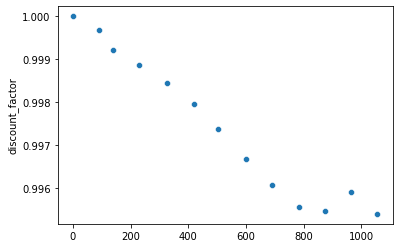

In [8]:
fig = sns.scatterplot(
    x = curve['time_to_maturity(days)'].values,
    y = curve.discount_factor,
)

In [9]:
list(curve['time_to_maturity(days)'].values)

[0, 92, 139, 230, 328, 419, 503, 601, 692, 783, 874, 965, 1056]

In [10]:
list(curve['discount_factor'].values)

[1.0,
 0.9996691650435465,
 0.9992246211121096,
 0.9988660836806285,
 0.9984447954461055,
 0.9979579305812499,
 0.9973668245099236,
 0.9966776772670756,
 0.9960708764228858,
 0.9955524701283017,
 0.995464399180763,
 0.9959125044793062,
 0.9954017251440678]

In [11]:
time_to_maturity = range(1056)
y = []
for i in time_to_maturity:
    y.append(
        Interpolator.interpolate(
            x_list=list(curve['time_to_maturity(days)'].values),
            y_list=list(curve['discount_factor'].values),
            z=i
        )
    )

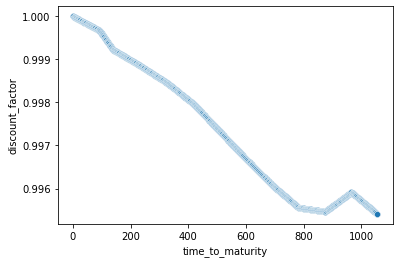

In [12]:
fig = sns.scatterplot(
    x = time_to_maturity,
    y = y,
)
plt.xlabel('time_to_maturity')
plt.ylabel('discount_factor')
None